# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [102]:
df = pd.read_csv("..\\data\\C2A2_data\\BinnedCsvs_d400\\fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


 #### Conocer las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

# Filtrar los datos entre 2005 y 2014
df2 = df[(df["Date"] >= "2005-01-01") & (df["Date"] <= "2014-12-31")]

# Crear una columna para el día del año (día y mes)
df2.loc[:, "DayOfYear"] = df2["Date"].dt.strftime("%m-%d")

tmax = df2[df2["Element"] == "TMAX"]
tmin = df2[df2["Element"] == "TMIN"]

tmax_record = tmax.groupby('DayOfYear')['Data_Value'].max()
tmin_record = tmin.groupby('DayOfYear')['Data_Value'].min()


#### Realizar el gráfico

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13256\1292261119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, "DayOfYear"] = df2["Date"].dt.strftime("%m-%d")


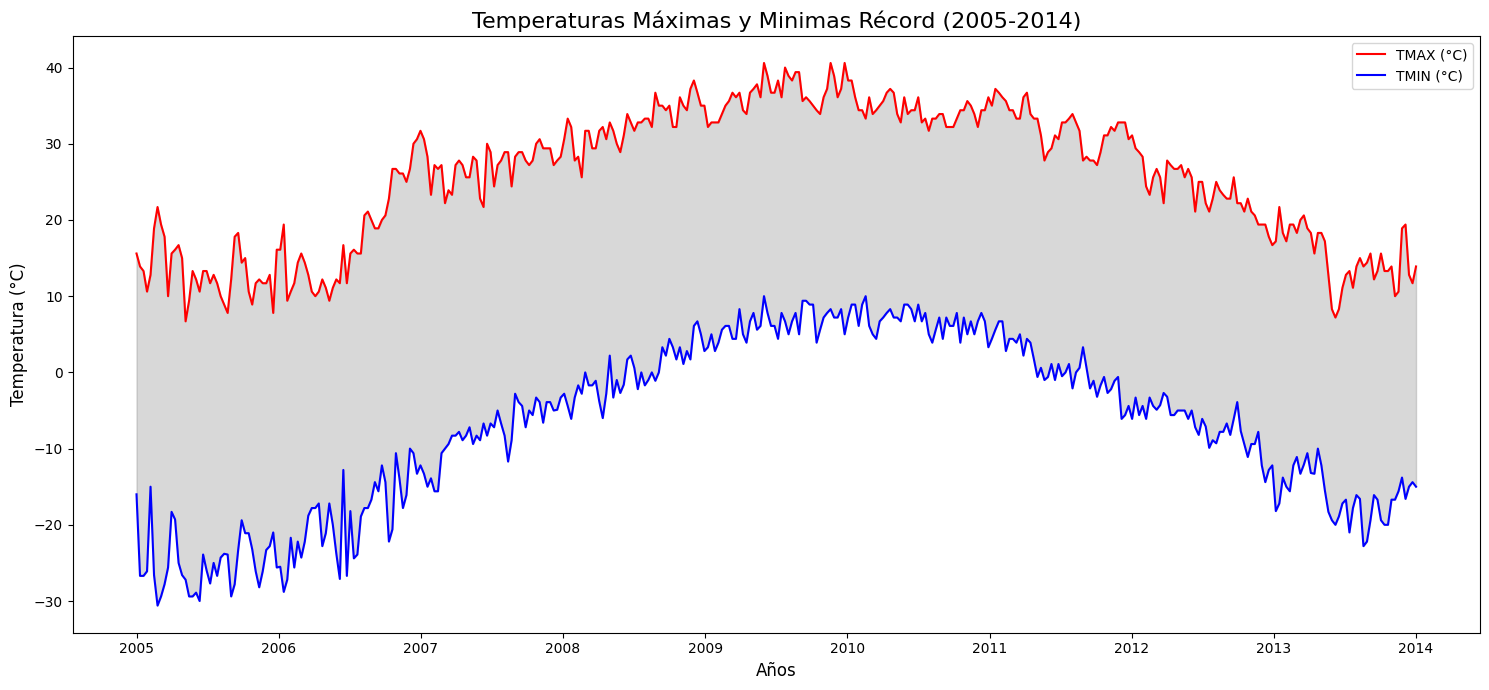

In [103]:
plt.figure(figsize=(15, 7))
plt.plot(tmax_record.index, tmax_record.values / 10, label='TMAX (°C)', color="red")
plt.plot(tmin_record.index, tmin_record.values / 10, label='TMIN (°C)', color="blue")
plt.fill_between(tmax_record.index, tmin_record.values / 10, tmax_record.values / 10, color='gray', alpha=0.3)

plt.title('Temperaturas Máximas y Minimas Récord (2005-2014)', fontsize=16)
plt.xlabel('Años', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
num_days = len(tmax_record)
years = range(2005, 2015)
tick_positions = np.linspace(0, num_days - 1, len(years))

plt.xticks(ticks=tick_positions, labels=years)
plt.legend()
plt.tight_layout()

plt.show()

#### Filtrar los datos de 2015

In [ ]:
df_2015 = df[df["Date"].dt.year == 2015]
df_2015.loc[:, "DayOfYear"] = df_2015["Date"].dt.strftime("%m-%d")

# Comparar las temperaturas de 2015 con los récords de 2005-2014
exceeding_points = df_2015[
    ((df_2015['Element'] == 'TMAX') & (df_2015['Data_Value'] > df_2015['DayOfYear'].map(tmax_record))) |
    ((df_2015['Element'] == 'TMIN') & (df_2015['Data_Value'] < df_2015['DayOfYear'].map(tmin_record)))]

#### Realizar el gráfico

C:\Users\Usuario\AppData\Local\Temp\ipykernel_13256\1875355654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.loc[:, "DayOfYear"] = df_2015["Date"].dt.strftime("%m-%d")


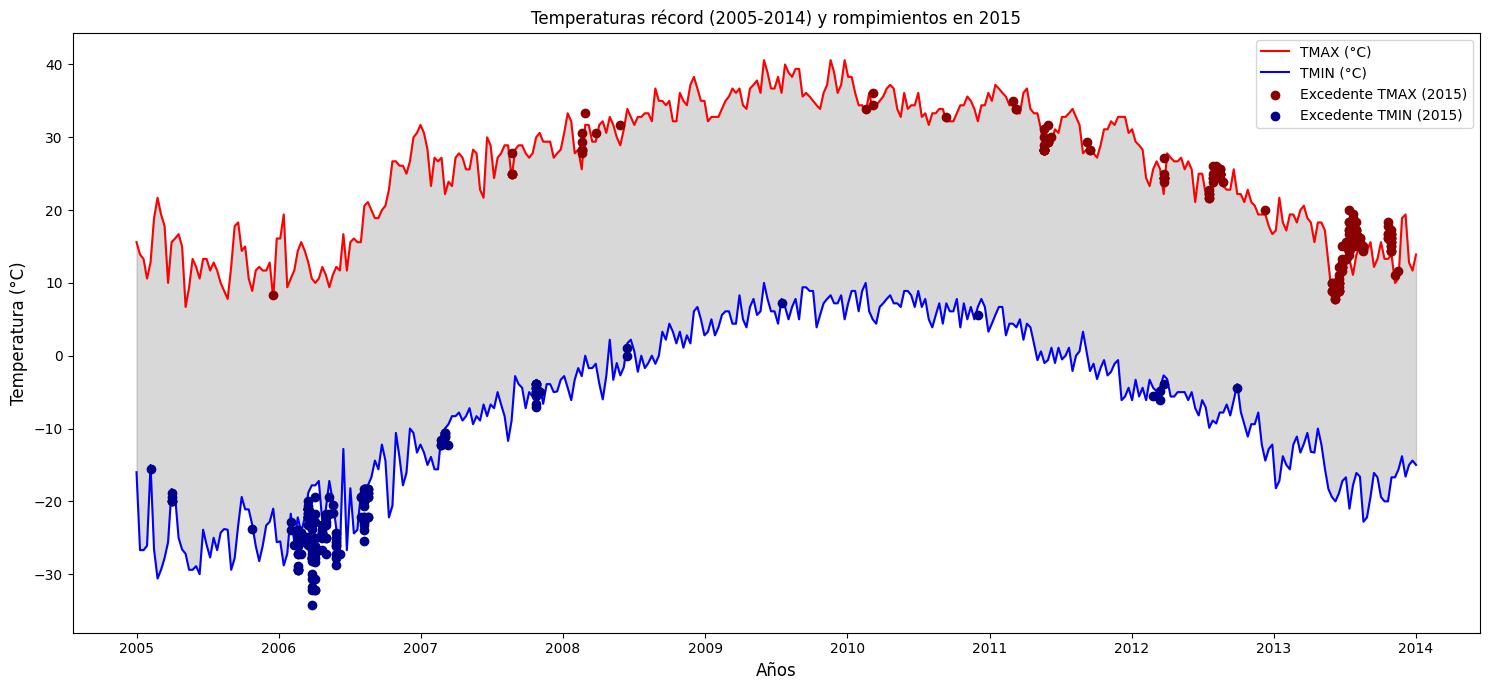

In [104]:

plt.figure(figsize=(15, 7))

plt.plot(tmax_record.index, tmax_record.values / 10, label='TMAX (°C)', color="red")
plt.plot(tmin_record.index, tmin_record.values / 10, label='TMIN (°C)', color="blue")
plt.fill_between(tmax_record.index, tmin_record.values / 10, tmax_record.values / 10, color='gray', alpha=0.3)

# Superponer los puntos excedentes de 2015
plt.scatter(
    exceeding_points[exceeding_points['Element'] == 'TMAX']['DayOfYear'],
    exceeding_points[exceeding_points['Element'] == 'TMAX']['Data_Value'] / 10,
    color='darkred', label='Excedente TMAX (2015)', zorder=5)
plt.scatter(
    exceeding_points[exceeding_points['Element'] == 'TMIN']['DayOfYear'],
    exceeding_points[exceeding_points['Element'] == 'TMIN']['Data_Value'] / 10,
    color='darkblue', label='Excedente TMIN (2015)', zorder=5)

plt.title('Temperaturas récord (2005-2014) y rompimientos en 2015')
plt.xlabel('Años', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

num_days = len(tmax_record)
years = range(2005, 2015)
tick_positions = np.linspace(0, num_days - 1, len(years))

plt.xticks(ticks=tick_positions, labels=years)
plt.legend()
plt.tight_layout()

plt.show()